In [9]:
import numpy as np
import matplotlib.pyplot as plt
import copy, warnings
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from astropy.modeling import models, fitting
from astropy.nddata import NDData
from astropy.stats import sigma_clipped_stats
from astropy.table import Table
from astropy.visualization import simple_norm
from photutils.background import MMMBackground
from photutils.detection import find_peaks
from photutils.psf import EPSFBuilder, extract_stars


data = np.load("image.npz")
x_target = data["x"]
y_target = data["y"]
lim_vals = data["lim_vals"]
image = data["image"].T
hwmag = data["hwmag"]
mask_hwmag = hwmag<14.5
x_min, x_max, y_min, y_max = lim_vals[0], lim_vals[1], lim_vals[2], lim_vals[3]

x_target_plate = x_target- x_min
y_target_plate = y_target- y_min

In [10]:
x_min, x_max, y_min, y_max
mask_size = 25
hsize = (mask_size - 1) / 2

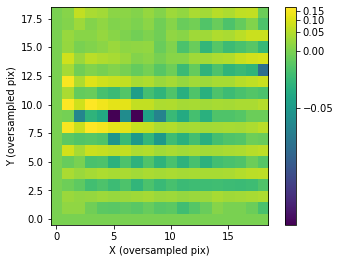

(-0.1, 0.1)

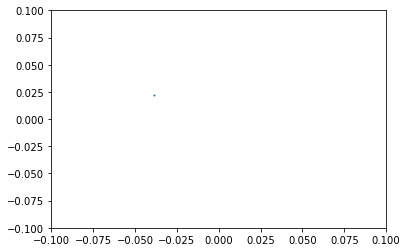

In [11]:
mask_region = ((x_target_plate > hsize) & (x_target_plate < (image.shape[1] -1 - hsize)) & (y_target_plate > hsize) & (y_target_plate < (image.shape[0] -1 - hsize)))
mask_all = mask_region * mask_hwmag

x_select = x_target_plate[mask_all]
y_select = y_target_plate[mask_all]

stars_tbl = Table()
stars_tbl['x'] = x_select
stars_tbl['y'] = y_select

###
mean_val, median_val, std_val = sigma_clipped_stats(image, sigma=2.)  
image_copy = copy.deepcopy(image)
image -= mean_val
###
ext_size  = 9 
nddata = NDData(data=image)
stars = extract_stars(nddata, stars_tbl, size=ext_size)

#PSF 
n_oversample = 2
n_maxiter = 5
norm_radius = 5.5
recentering_boxsize =7
epsf_builder = EPSFBuilder(oversampling=n_oversample,
                               maxiters=n_maxiter, progress_bar=False,
                               norm_radius=norm_radius, recentering_boxsize=recentering_boxsize,
                               center_accuracy=0.0001)
epsf, fitted_stars = epsf_builder(stars)
norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.xlabel('X (oversampled pix)')
plt.ylabel('Y (oversampled pix)')
plt.colorbar()
plt.show()
pos_stars = fitted_stars.center_flat
dx= pos_stars[:,0] - x_select
dy= pos_stars[:,1] - y_select

plt.scatter(dx, dy, s =1)
wd_plt = 0.1

plt.xlim(-wd_plt, wd_plt)
plt.ylim(-wd_plt, wd_plt)

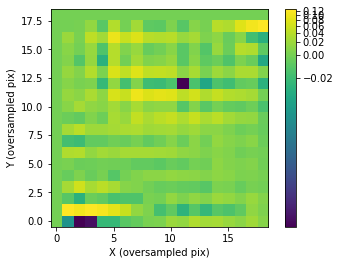

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
mask_region = ((x_target_plate > hsize) & (x_target_plate < (image.shape[1] -1 - hsize)) & (y_target_plate > hsize) & (y_target_plate < (image.shape[0] -1 - hsize)))
mask_all = mask_region * mask_hwmag #* mask_dx

x_select = x_target_plate[mask_all]
y_select = y_target_plate[mask_all]

mask_dr = np.abs((dx**2 + dy**2)**0.5) < 0.05
x_select_2 =x_select[mask_dr]
y_select_2 =y_select[mask_dr]


stars_tbl = Table()
stars_tbl['x'] = x_select_2
stars_tbl['y'] = y_select_2

###
mean_val, median_val, std_val = sigma_clipped_stats(image, sigma=2.)  
image_copy = copy.deepcopy(image)
image -= mean_val
###
ext_size  = 9 
nddata = NDData(data=image)
stars = extract_stars(nddata, stars_tbl, size=ext_size)

#PSF 
n_oversample = 2
n_maxiter = 10
norm_radius = 5.5
recentering_boxsize =7
epsf_builder2 = EPSFBuilder(oversampling=n_oversample,
                               maxiters=n_maxiter, progress_bar=False,
                               norm_radius=norm_radius, recentering_boxsize=recentering_boxsize,
                               center_accuracy=0.0001)
epsf2, fitted_stars2 = epsf_builder2(stars)
norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.xlabel('X (oversampled pix)')
plt.ylabel('Y (oversampled pix)')
plt.colorbar()
plt.show()
pos_stars2 = fitted_stars2.center_flat
dx2= pos_stars2[:,0] - x_select_2
dy2= pos_stars2[:,1] - y_select_2

plt.scatter(dx2, dy2, s =1)
wd_plt = 1

plt.xlim(-wd_plt, wd_plt)
plt.ylim(-wd_plt, wd_plt)

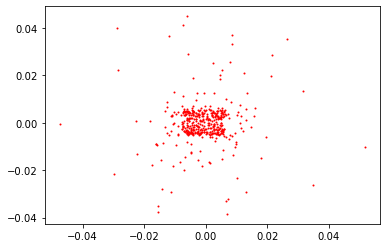

In [369]:
plt.scatter(dx2, dy2, s =1, color="r")



812.4173046962758
1.1698875850825734


<ipython-input-381-abb99d1dbcaa>:6: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(image), extent=[-0.5, x_max-x_min-0.5, y_max-y_min-0.5, -0.5])


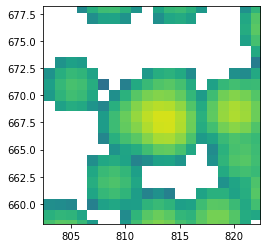

1002.6990923025129
0.2842690844235805


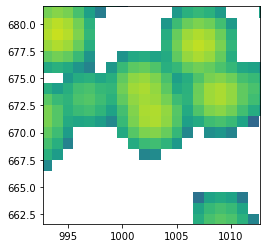

249.44427195651795
0.38962712799963667


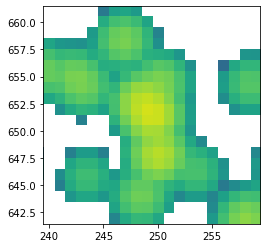

248.62841924504917
1.0333878852655172


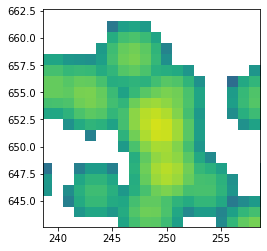

671.1757122462191
0.22122336705516332


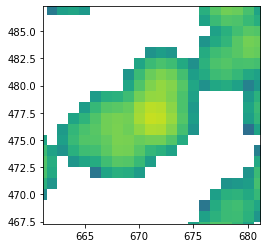

671.6083946442895
0.29993458849349564


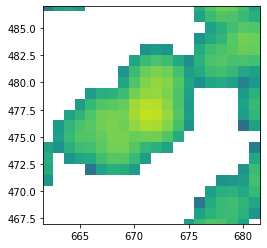

1026.0340686703473
0.785641215092462


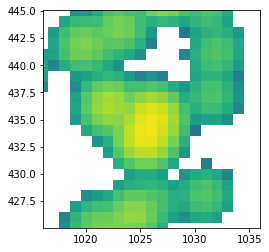

1025.4320644219122
0.9032197834343857


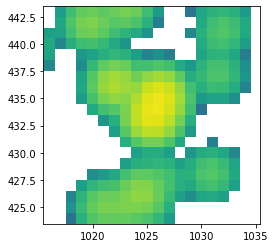

1269.1702286252178
0.8481314527267844


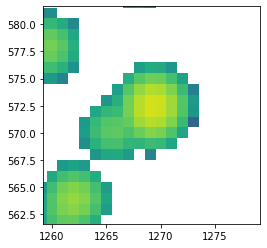

840.8600295753604
2.9646136899452853


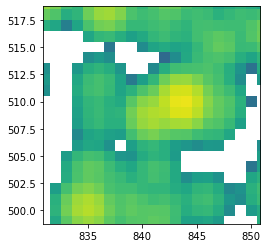

571.5610575994627
3.1588183574576854


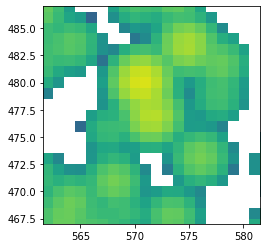

1267.1825663469929
2.7451305728620707


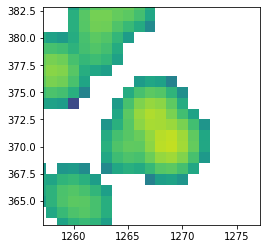

1229.4076827764015
2.4930383651295593


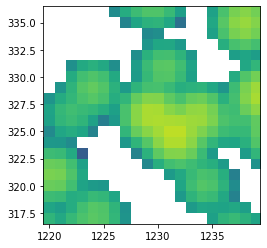

780.267048809997
0.2810959101847595


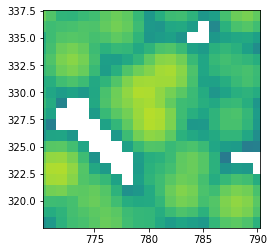

779.4576719648994
0.4849599308063362


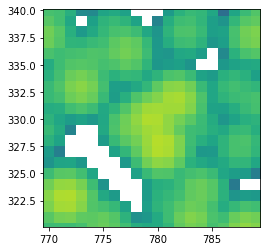

994.3231914893919
2.779028584694135


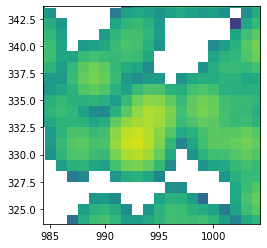

125.09982631166748
0.30309239447000863


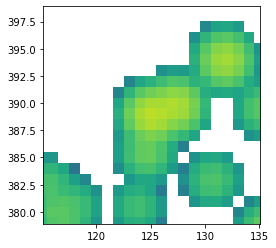

127.25523887689756
1.9874938945625984


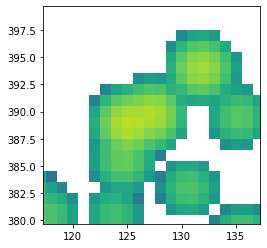

In [381]:
wd_plot =10
for i in range(len(dx)):
    dr_now = (dx[i]**2+  dy[i]**2)**0.5
    if dr_now >.2:
        print(x_select[i])
        plt.imshow(np.log10(image), extent=[-0.5, x_max-x_min-0.5, y_max-y_min-0.5, -0.5])
        print(dr_now)
        x_cen = x_select[i]
        y_cen = y_select[i]

        plt.xlim(x_cen -wd_plot, x_cen +wd_plot)
        plt.ylim(y_cen -wd_plot, y_cen +wd_plot)
        plt.show()
        

(-0.05, 0.05)

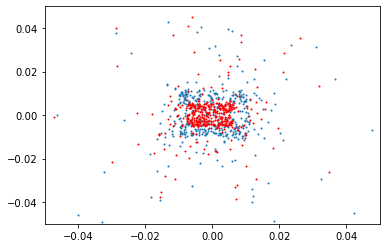

In [364]:
plt.scatter(dx, dy, s =1)
plt.scatter(dx2, dy2, s =1, color="r")

wd_plt = 0.05

plt.xlim(-wd_plt, wd_plt)
plt.ylim(-wd_plt, wd_plt)